In [69]:
# Importando as Bibliotecas:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set() é usado aqui para definir o "tema" estético dos gráficos.
sns.set()

from sklearn.neighbors       import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_absolute_percentage_error, r2_score
from sklearn.linear_model    import LinearRegression
from sklearn.preprocessing   import StandardScaler, MinMaxScaler
from sklearn.tree            import DecisionTreeRegressor, plot_tree

# Usando Modelo de Regressao Linear :

In [24]:
# Leitura do Arquivo:

dataset = pd.read_csv("model_input.csv")

# Vamos chamar de features as variáveis que queremos usar
## Vamos chamar de y o que queremos prever:

##  X ==> contém todo DataFrame exceto o campo 'price_limpo'
##  y ==> contém somente a coluna "price_limpo"


In [25]:

X = dataset[["area_limpo", "bathrooms_limpo", "rooms_limpo", "condo_limpo", "garages_limpo"]]
y = dataset["price_limpo"]

In [26]:
# Train test split, vamos embaralhar os dados guardar 20% dos dados para teste
#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=12345, shuffle=True)

In [27]:
X.shape

(12137, 5)

In [28]:
X_train.shape

(9709, 5)

In [29]:
X_test.shape

(2428, 5)

In [8]:
X[:10]

,area_limpo,bathrooms_limpo,rooms_limpo,condo_limpo,garages_limpo
0,64,2.0,2.0,778.0,1.0
1,83,3.0,2.0,600.0,2.0
2,75,2.0,3.0,717.0,1.0
3,47,2.0,1.0,463.0,1.0
4,67,2.0,2.0,778.0,1.0
5,131,5.0,3.0,950.0,2.0
6,49,2.0,1.0,648.0,1.0
7,56,2.0,1.0,502.0,0.0
8,110,2.0,3.0,700.0,2.0
9,157,5.0,3.0,1550.0,2.0


In [30]:
X_train[:10]

,area_limpo,bathrooms_limpo,rooms_limpo,condo_limpo,garages_limpo
11278,44,1.0,2.0,220.0,0.0
8520,72,2.0,2.0,450.0,1.0
2045,41,1.0,1.0,350.0,0.0
10087,64,2.0,2.0,580.0,1.0
10525,52,1.0,2.0,380.0,1.0
1895,77,2.0,1.0,590.0,0.0
6714,61,2.0,2.0,600.0,1.0
2610,57,1.0,2.0,450.0,1.0
4283,253,5.0,4.0,1860.0,2.0
6095,102,3.0,3.0,816.0,2.0


In [31]:
y_train

11278    168095.0
8520     485000.0
2045     350000.0
10087    360000.0
10525    265000.0
           ...   
11689    380000.0
3492     389990.0
2177     290000.0
11749    260000.0
4578     890000.0
Name: price_limpo, Length: 9709, dtype: float64

In [ ]:
# Vamos fazer uma regressao linear simples:

# w1*area + w2*banheiro + w3*quartos + w4*condo + w5*garagem = preco_previsto
# onde cada w é o peso que vamos dar para cada uma das variáveis
# Como nos vamos prever um preço e sabemos o preço real, podemos calcular o erro
# O objetivo do nosso aprendizado é encontrar os pesos que minimizam esse erro!

In [32]:
# Modelo de Regressão Simples:

model = LinearRegression(fit_intercept=False)

In [34]:
# Aplicar aos nossos dados de treino (80% dos dados):

model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [35]:
# Vamos prever nos nossos dados de treino e de teste e comparar o error médio

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

In [ ]:
# Erro médio percentual do treino
# Vamos calcular o erro percentual como sendo : (y real - y previsto)/y real
# Como não queremos que o positivo anule o negativo, vamos pegar o valor absoluto
# Vamos pegar a média deles
np.mean(np.abs(y_train - y_pred_train)/y_train)

0.26984243749508163

In [36]:
# O mesmo mas agora para teste e comparamos para ver se são comparáveis:

np.mean(np.abs(y_test - y_pred_test)/y_test)

0.2730208848721279

In [17]:
# Coeficientes do modelo ("peso" calculado para cada variável):

model.coef_

array([   6742.96057555,   63460.06119565, -163901.34581316,
           546.11546263,   45021.9690481 ])

# Modelo K-NearestNeighbors = KNN

In [2]:
# Vamos usar o modelo K-NearestNeighbors ou knn
# Este é o modelo mais simples: quando queremos saber o preço de um apartamento,
# ele busca os k apartamentos mais semelhantes (mais próximos segundo as variáveis 
# utilizadas) e calcula a média de preço deles.

In [40]:
knn = KNeighborsRegressor(n_neighbors=5)

In [41]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [42]:
y_pred = knn.predict(X_test)

In [43]:
mean_absolute_percentage_error(y_test, y_pred)

0.22961407660052136

In [44]:
# Testando com k entre 1 e 9
# Usamos numeros impares para evitar empates, normalmente k = 5 (ideal)

for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mean_absolute_percentage_error(y_test, y_pred)
    print(f"k={k}, mape={error}")

k=1, mape=0.24793799578522147
k=3, mape=0.23363091847513526
k=5, mape=0.22961407660052136
k=7, mape=0.23138005731562153
k=9, mape=0.2343561708200454


In [ ]:
# Como é um modelo baseado em distância e temos variáveis em escalas bastante diferentes
# (exemplo quartos de 1 a 5 e condomínio de 100 a 50000), é imporante normalizar estes dados
# As duas maneiras mais comuns é usar o minmaxscaler para passar os dados para valores entre
# 0 e 1 ou o standardscaler, que transformar os dados em uma distribuicao normal com
# média 0 e desvio padrao 1.

In [45]:
scaler = MinMaxScaler()

In [46]:
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [47]:
# Train test split, vamos embaralhar os dados guardar 20% dos dados para teste:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, random_state=12345, shuffle=True)

In [48]:
# Testando com k entre 1 e 9
# Usamos numeros impares para evitar empates
# Repare como os resultados são:

for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mean_absolute_percentage_error(y_test, y_pred)
    print(f"k={k}, mape={error}")

k=1, mape=0.22729410705010228
k=3, mape=0.2191853111246389
k=5, mape=0.2157983887246736
k=7, mape=0.21775702102646935
k=9, mape=0.21817585257074687


In [49]:
# Criando um novo apartamento para testar
# e prevendo o valor deles:

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [50]:
novo_apto = pd.DataFrame([[60, 4, 2, 500, 1]], columns=X_train.columns)

In [51]:
# Precisamos aplicar o scaler aos dados deste novo apartamento:
novo_apto_scaled = scaler.transform(novo_apto)

In [52]:
# prevendo o valor do apartamento
knn.predict(novo_apto_scaled)

array([894333.33333333])

In [53]:
# Analisando residuos
# Resíduos são os erros do modelo.
# Um bom modelo tem erros centrado no zero e normalmente distribuidos
# Isso significa que o modelo "erra igualmente" para cima e para baixo:

residuals = y_test - y_pred

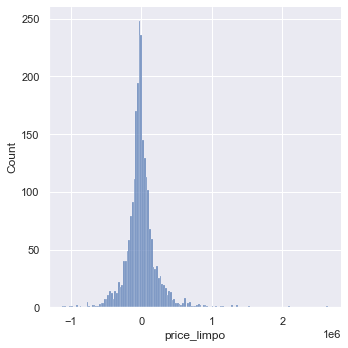

In [54]:
sns.displot(residuals)

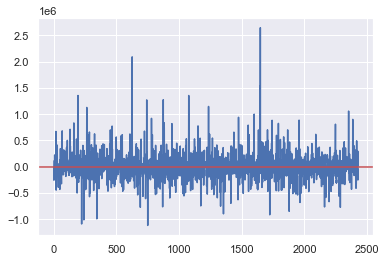

In [56]:

residuals_df = pd.DataFrame(residuals).reset_index(drop=True)
residuals_df["price_limpo"].plot()
plt.axhline(y=0, c="r")

## Adicionando bairro

In [58]:
# Leitura do Arquivo .csv:


dataset = pd.read_csv("model_input_with_crawler.csv")

X = dataset[["area_limpo", "bathrooms_limpo", "rooms_limpo", "condo_limpo", "garages_limpo", "crawler"]]
y = dataset["price_limpo"]

In [59]:
# Vamos usar a funcao get dummies para executar o "one-hot-encoding"
# Isso tranforma a coluna bairro em diversas colunas binárias (1 e 0), uma
# para cada bairro
X = pd.concat((X,pd.get_dummies(X["crawler"])), axis=1).drop(columns=["crawler"])

In [60]:
X

,area_limpo,bathrooms_limpo,rooms_limpo,condo_limpo,garages_limpo,bras,brooklin,butanta,campo_limpo,freguesia_do_o,...,moema,mooca,morumbi,pinheiros,republica,santana,saude,tucuruvi,vila_mariana,vila_matilde
0,64,2.0,2.0,778.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,83,3.0,2.0,600.0,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,75,2.0,3.0,717.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,2.0,1.0,463.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,67,2.0,2.0,778.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12132,50,1.0,2.0,350.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12133,78,2.0,3.0,650.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12134,82,2.0,3.0,650.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12135,82,2.0,3.0,650.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Train test split, vamos embaralhar os dados guardar 20% dos dados para teste:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=12345, shuffle=True)

In [61]:
# Resultados bem melhores com o bairro:

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.2526542514249925

-3153.395267866112

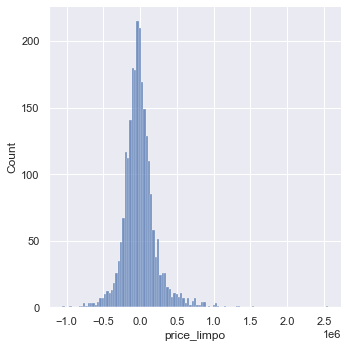

In [62]:

residuals = y_test - y_pred
sns.displot(residuals)
np.mean(residuals)


In [63]:
# Vamos novamente aplicar o scaler para usar o knn novamente:

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, random_state=12345, shuffle=True)

In [65]:
# Repare que os resultados são consideravelmente melhores:

for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mean_absolute_percentage_error(y_test, y_pred)
    print(f"k={k}, mape={error}")

k=1, mape=0.1409448900207222
k=3, mape=0.1354339966109072
k=5, mape=0.136140417977782
k=7, mape=0.1373137934181601
k=9, mape=0.13966774799092962


In [66]:

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
error = mean_absolute_percentage_error(y_test, y_pred)
residuals = y_test - y_pred


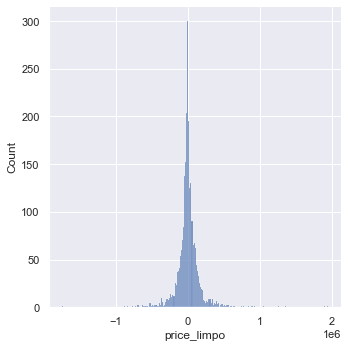

In [67]:
sns.displot(residuals)

In [68]:
r2_score(y_test, y_pred)

0.8829180508376197

# Decision tree

In [70]:
# Carrega o dataset:

dataset = pd.read_csv("model_input_with_crawler.csv")
X = dataset[["area_limpo", "bathrooms_limpo", "rooms_limpo", "condo_limpo", "garages_limpo", "crawler"]]
y = dataset["price_limpo"]


In [71]:
# Vamos usar a funcao get dummies para executar o "one-hot-encoding"
# Isso tranforma a coluna bairro em diversas colunas binárias (1 e 0), uma
# para cada bairro:

X = pd.concat((X,pd.get_dummies(X["crawler"])), axis=1).drop(columns=["crawler"])

In [72]:
# Train test split, vamos embaralhar os dados guardar 20% dos dados para teste:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=12345, shuffle=True)

In [74]:
dt = DecisionTreeRegressor(max_depth=3)

In [75]:
dt.fit(X_train[['area_limpo', 'bathrooms_limpo', 'rooms_limpo', 'condo_limpo','garages_limpo']], y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
dt.get_depth()

In [ ]:
y_pred = dt.predict(X_test[['area_limpo', 'bathrooms_limpo', 'rooms_limpo', 'condo_limpo','garages_limpo']])

In [76]:
error = mean_absolute_percentage_error(y_test, y_pred)
residuals = y_test - y_pred


In [77]:
print(error)

0.1354339966109072


[Text(558.0, 951.3000000000001, 'condo_limpo <= 932.5\nmse = 237984163298.02\nsamples = 9709\nvalue = 669843.483'),
 Text(279.0, 679.5, 'condo_limpo <= 593.5\nmse = 67153796421.867\nsamples = 8411\nvalue = 532665.28'),
 Text(139.5, 407.70000000000005, 'area_limpo <= 58.5\nmse = 29186116925.969\nsamples = 5023\nvalue = 418706.85'),
 Text(69.75, 135.89999999999998, 'mse = 17800855357.229\nsamples = 2669\nvalue = 346624.498'),
 Text(209.25, 135.89999999999998, 'mse = 29524273619.706\nsamples = 2354\nvalue = 500434.887'),
 Text(418.5, 407.70000000000005, 'area_limpo <= 87.5\nmse = 75645338780.274\nsamples = 3388\nvalue = 701618.408'),
 Text(348.75, 135.89999999999998, 'mse = 53808889625.348\nsamples = 2628\nvalue = 640183.333'),
 Text(488.25, 135.89999999999998, 'mse = 92973395393.424\nsamples = 760\nvalue = 914054.429'),
 Text(837.0, 679.5, 'area_limpo <= 151.5\nmse = 432858604317.221\nsamples = 1298\nvalue = 1558754.009'),
 Text(697.5, 407.70000000000005, 'area_limpo <= 101.5\nmse = 1947

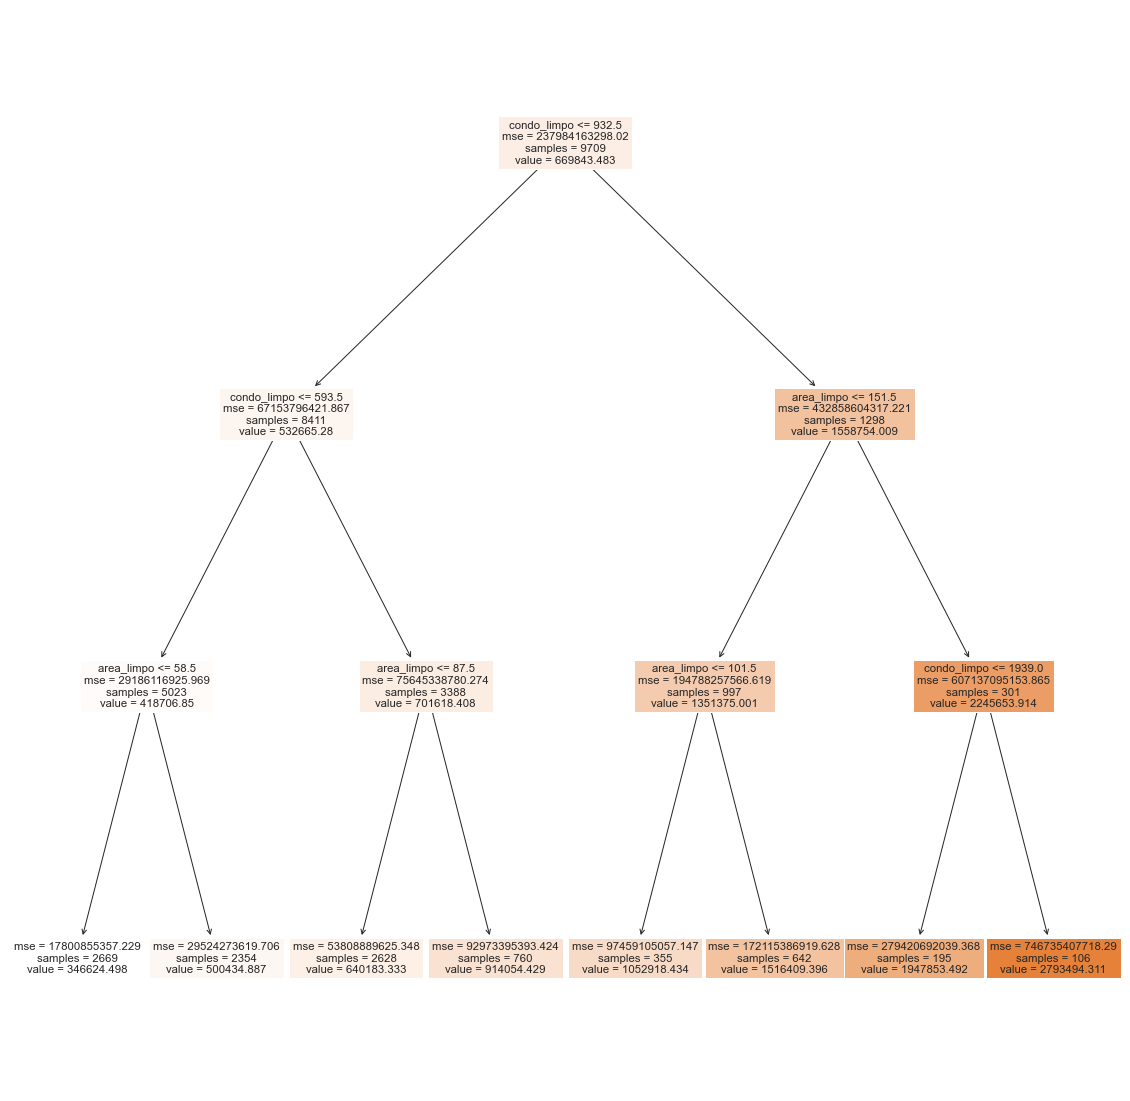

In [78]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, feature_names=['area_limpo', 'bathrooms_limpo', 'rooms_limpo', 'condo_limpo','garages_limpo'])